## Script for tranforming csv into sql script with changes in data structure

In [1]:
import math
import pandas as pd


In [2]:
data = pd.read_csv('books.csv')

In [3]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         3 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [5]:
data = data.drop(['isbn13', 'language_code', 'text_reviews_count'], 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bookID            11127 non-null  int64 
 1   title             11127 non-null  object
 2   authors           11127 non-null  object
 3   average_rating    11127 non-null  object
 4   isbn              11127 non-null  object
 5     num_pages       11127 non-null  object
 6   ratings_count     11127 non-null  int64 
 7   publication_date  11127 non-null  object
 8   publisher         11127 non-null  object
 9   Unnamed: 12       3 non-null      object
dtypes: int64(2), object(8)
memory usage: 869.4+ KB


In [7]:
p_data = data[['bookID', 'title', 'authors', 'average_rating', 'isbn', '  num_pages', 'ratings_count', 'publication_date', 'publisher']].copy()

### Change data in column ratings_count into value between 0 and 100 using normalization method

In [8]:
p_data.sort_values('ratings_count', ascending=False)

,bookID,title,authors,average_rating,isbn,num_pages,ratings_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,501,4597666,09/06/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,366,2530894,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.8,316769177,277,2457092,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,736,2418736,04/01/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,435,2339585,05/01/2004,Scholastic Inc.
...,...,...,...,...,...,...,...,...,...
7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0,9027712050,210,0,5/31/1981,Springer
6880,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0,394755669,288,0,05/12/1988,Knopf Doubleday Publishing Group
5477,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,563388544,2,0,3/30/2005,BBC Physical Audio
2051,7400,The Baby Emergency (Tennengarrah Clinic #1),Carol Marinelli,3.6,263181499,285,0,06/01/2004,Mills & Boon


### Since this databese will be use for college project of library I'll change ratings count of Twilight book to 26k. Because I want to make simple popularity indicator 


In [9]:
p_data.loc[10340,'ratings_count']=2600000

In [10]:

min_x = p_data['ratings_count'].min().astype(float)
max_x = p_data['ratings_count'].max().astype(float)

q = max_x - min_x

def normalization(x):
    return (x - min_x) / q


In [11]:
popularity = p_data['ratings_count'].apply(lambda x: normalization(x) * 100).astype(float)

In [12]:
p_data['ratings_count'] = popularity

In [13]:
p_data.head()

,bookID,title,authors,average_rating,isbn,num_pages,ratings_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,652,80.603462,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,870,82.814115,09/01/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,352,0.243577,11/01/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,435,89.984038,05/01/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,2690,1.593385,9/13/2004,Scholastic


In [14]:
# Change columns names 
p_data = p_data.rename(columns={'bookID': 'id', '  num_pages': 'pages', 'average_rating': 'rating', 'ratings_count': 'popularity', 'publication_date': 'year'})

In [15]:
p_data.isnull().sum()  #Check for nulls 



id            0
title         0
authors       0
rating        0
isbn          0
pages         0
popularity    0
year          0
publisher     0
dtype: int64

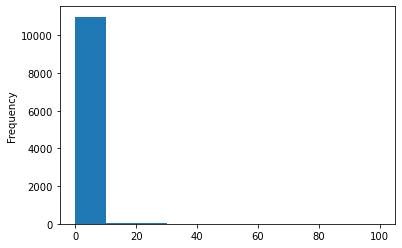

In [16]:
p_data["popularity"] = p_data["popularity"].astype(float)
p_data["popularity"].plot.hist()   

## From the histogram above we see most of book has popularity value around 0 and 10
'popularity' I made with number of ratings which might not be the best indicator of how popular book is but for the puropse of this a project of library for college will be great.
We will choose around 300 - 500 of the most 'popular' books from entire dataset

In [17]:

print(p_data[p_data['popularity'] > 2].count())


id            653
title         653
authors       653
rating        653
isbn          653
pages         653
popularity    653
year          653
publisher     653
dtype: int64


In [18]:
p_data.sort_values('popularity', ascending=False)

,id,title,authors,rating,isbn,pages,popularity,year,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,501,100.000000,09/06/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,366,97.342077,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.8,316769177,277,94.503538,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,736,93.028308,04/01/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,435,89.984038,05/01/2004,Scholastic Inc.
...,...,...,...,...,...,...,...,...,...
7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0,9027712050,210,0.000000,5/31/1981,Springer
6880,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0,394755669,288,0.000000,05/12/1988,Knopf Doubleday Publishing Group
5477,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,563388544,2,0.000000,3/30/2005,BBC Physical Audio
2051,7400,The Baby Emergency (Tennengarrah Clinic #1),Carol Marinelli,3.6,263181499,285,0.000000,06/01/2004,Mills & Boon


### Change csv into sql

In [19]:
# get 500 the most popular books
books = p_data.head(500)
books = books.sort_values('popularity', ascending=False)


In [28]:
with open("script2.sql", "w",  encoding='utf-8') as file:
    
    for index, row in books.iterrows():
        columns = []
        columns.append(row.title)
        columns.append(row.authors)
        columns.append(row.publisher)
        
        for i in range(len(columns)): 
            inx = columns[i].find("'")
            temp = 0
            while inx != -1:            
                columns[i] = columns[i][:inx] + "'" + columns[i][inx:] 
                temp = columns[i][inx+2:].find("'") 
                if temp != -1:                 
                    inx = inx + temp + 2
                else:
                    break
                
                
        
        
            
            
        script_line = "INSERT INTO books(id, title, author, rating, popularity, pages, year, publisher) VALUES({}, '{}', '{}', {}, {}, {}, '{}', '{}');".format(row.id, columns[0], columns[1], row.rating, row.popularity, row.pages, row.year, columns[2])
        file.write(script_line + "\n")
    